# Combining Thompson Sampling Results

In [10]:
import pinot
ds = pinot.data.moonshot()
actual_best = max([d[1].item() for d in ds])

In [37]:
import pandas as pd

best_human = pd.read_csv('best_Human.csv', index_col=0)
pro_human = pd.read_csv('pro_Human.csv', index_col=0)
retro_human = pd.read_csv('retro_Human.csv', index_col=0)

for df in [best_human, pro_human, retro_human]:
    df['Type'] = 'Human'

best_ei = pd.read_csv('best_ExpectedImprovement.csv', index_col=0)
pro_ei = pd.read_csv('pro_ExpectedImprovement.csv', index_col=0)
retro_ei = pd.read_csv('retro_ExpectedImprovement.csv', index_col=0)

for df in [best_ei, pro_ei, retro_ei]:
    df['Type'] = 'ExpectedImprovement'

best = pd.concat([best_human, best_ei])
pro = pd.concat([pro_human, pro_ei])
retro = pd.concat([retro_human, retro_ei])

In [38]:
def larger_font(ylabel):
    plt.xticks(size=20)
    plt.xlabel('Round', size=20)

    plt.yticks(size=20)
    plt.ylabel(ylabel, size=20)

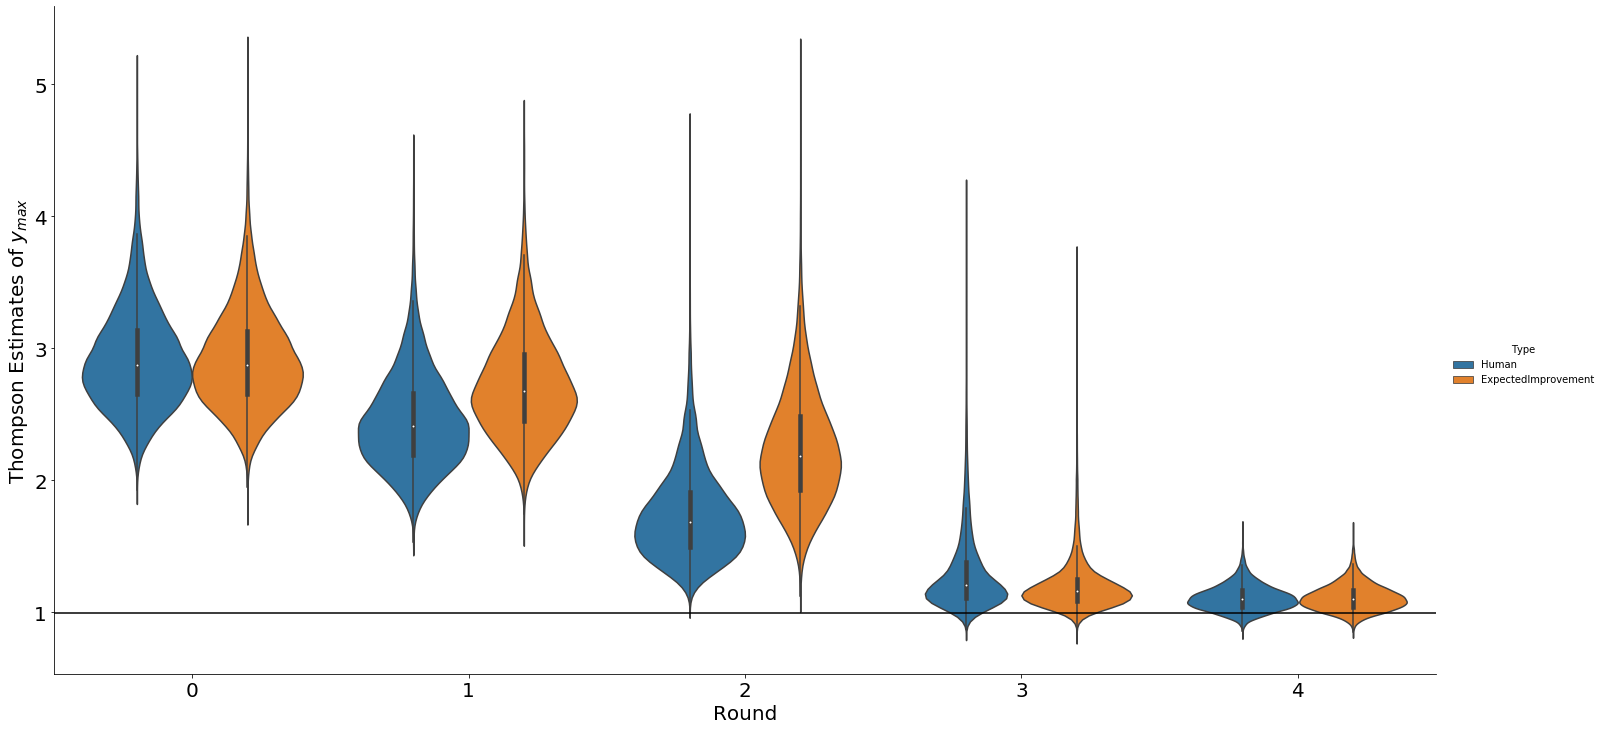

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='Round', y='Value',
            hue='Type',
            data=retro,
            kind='violin',
            height=10,
            aspect=2,
#             split=True
            palette='tab10'
)

larger_font('Thompson Estimates of $y_{max}$')
plt.axhline(actual_best, color='black')

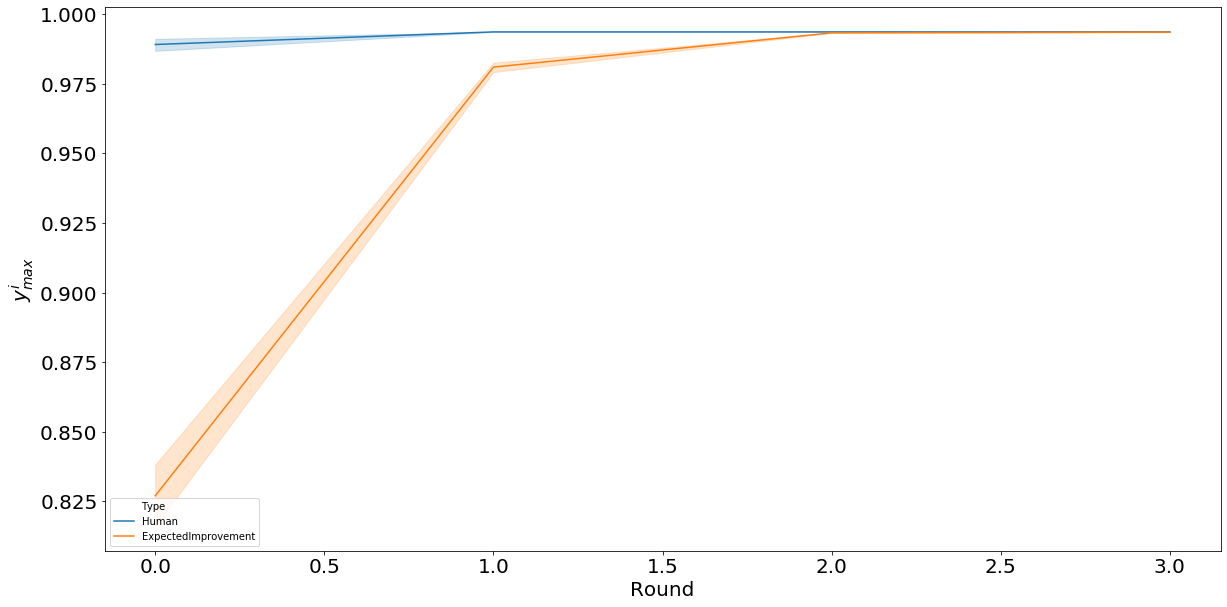

In [55]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))
# plt.axhline(actual_best, color='black')
sns.lineplot(x='Round', y='Value', hue='Type', data=best, ax=ax)
larger_font('$y_{max}^i$')

In [67]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns

improvement_list = []
for type_ in ['Human', 'ExpectedImprovement']:
    
    pro_subset = pro[pro['Type'] == type_]
    best_subset = best[best['Type'] == type_]
    
    for trial in pro_subset.Trial.unique():
        
        for round_ in pro_subset.Round.unique():
            
            round_values = pro_subset[np.logical_and(pro_subset['Round'] == round_, pro_subset['Trial'] == trial)]['Value']
            round_best = best[np.logical_and(best['Round'] == round_, best['Trial'] == trial)]['Value'].iloc[0]
            improvement_list.append({'Acquisition Function': 'ExpectedImprovement',
                                     'Trial': trial,
                                     'Round': round_,
                                     'Type': type_,
                                     'ProbabilityImprovement': (round_values > round_best).mean(),
                                     'ExpectedImprovement': (np.maximum(round_values - round_best, 0)).mean()})

improvement_df = pd.DataFrame(improvement_list)

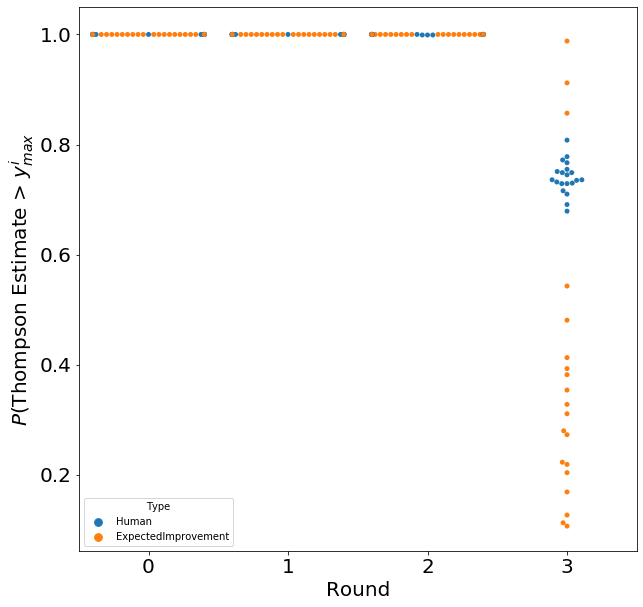

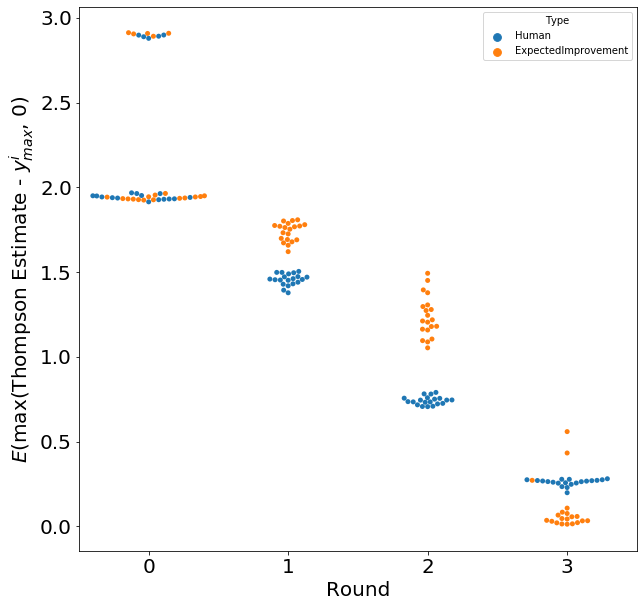

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(10, 10))
sns.swarmplot(x='Round', y='ProbabilityImprovement', hue='Type', data=improvement_df, ax=ax)
larger_font('$P$(Thompson Estimate > $y_{max}^i$)')

fig, ax = plt.subplots(figsize=(10, 10))
sns.swarmplot(x='Round', y='ExpectedImprovement', hue='Type', data=improvement_df, ax=ax)
plt.ylabel('Thompson Estimates of $y_{max}$')
larger_font('$E$($\max$(Thompson Estimate - $y_{max}^i$, 0)')